<!DOCTYPE html>
<html>
<head>
    <style>
        table {
            width: 50%;
            border-collapse: collapse;
            margin: 20px auto;
        }
        th, td {
            border: 1px solid #dddddd;
            text-align: left;
            padding: 15px;
        }
        th {
            background-color: #f2f2f2;
        }
    </style>
</head>
<body>
<center>
<img src="https://hcmut.edu.vn/img/nhanDienThuongHieu/bk_name_en.png" alt="hcmut logo"/>

<table>
    <tr>
        <th>Role</th>
        <th>Name</th>
        <th>ID</th>
    </tr>
    <tr>
        <td>Institution</td>
        <td>Ho Chi Minh University of Technology</td>
        <td></td>
    </tr>
    <tr>
        <td>Mentor</td>
        <td>Dr. Nguyen Duc Dung</td>
        <td></td>
    </tr>
    <tr>
        <td>Actor</td>
        <td>Doan Tran Cao Tri</td>
        <td>2010733</td>
    </tr>
</table>

</center>
</body>
</html>


In [1]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' creden

# Setup and Import

In [2]:
!pip install datasets evaluate -q
!pip install jiwer -q
!pip install -U accelerate -q
!pip install -U transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 37.0 MB/s eta 0:00:00


In [3]:
from datasets import load_dataset

In [4]:
dataset = load_dataset("TeeA/Pokemon-Captioning-Classification")
dataset

Generating train split:   0%|          | 0/4869 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1390 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/732 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels', 'caption'],
        num_rows: 4869
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels', 'caption'],
        num_rows: 1390
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels', 'caption'],
        num_rows: 732
    })
})

In [5]:
import torch
from PIL import Image
from transformers import AutoProcessor, AutoModelForCausalLM
from transformers import AutoTokenizer, RobertaForSequenceClassification

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# GIT

In [7]:
processor = AutoProcessor.from_pretrained("TeeA/git-base-pokemon")
gitmodel = AutoModelForCausalLM.from_pretrained("TeeA/git-base-pokemon").to(device)

preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/862 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/136 [00:00<?, ?B/s]

# Roberta

In [8]:
tokenizer = AutoTokenizer.from_pretrained("TeeA/roberta-classifier-pokemon")
roberta = RobertaForSequenceClassification.from_pretrained("TeeA/roberta-classifier-pokemon").to(device)

tokenizer_config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/958 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

# Prediction

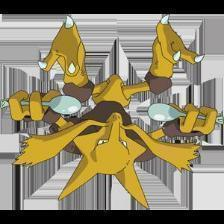

Ground truth label: Alakazam
Image captioning: this pokemon is a quadruped, mammalian creature with yellow fur and black stripes. it has a long, pointed snout with a pair of sharp teeth protruding from its lower jaw. its arms are longer than its legs, and it has three claws
Sequence classification: Electabuzz


In [11]:
def run(image):
    # git
    inputs = processor(images=image, return_tensors="pt").to(device)
    generated_ids = gitmodel.generate(pixel_values=inputs.pixel_values, max_length=50)
    generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    # roberta
    inputs = tokenizer(generated_caption, return_tensors="pt").to(device)
    with torch.no_grad():
        logits = roberta(**inputs).logits
    predicted_class_id = logits.argmax().item()
    classname = roberta.config.id2label[predicted_class_id]
    return generated_caption, classname

sample = dataset['test'][1]
image = sample['image']
display(image)
print("Ground truth label:", roberta.config.id2label[sample['labels']])
result_model = run(image)
print("Image captioning:", result_model[0])
print("Sequence classification:", result_model[1])

In [13]:
references = []
predictions = []

for sample in dataset['test']:
    image = sample['image']
    references.append(sample['labels'])

    result_model = run(image)

    predictions.append(roberta.config.label2id[result_model[1]])
    # break
references, predictions

([127,
  127,
  127,
  127,
  127,
  61,
  61,
  115,
  115,
  53,
  53,
  53,
  65,
  65,
  65,
  65,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  111,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  69,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  146,
  14

In [14]:
from datasets import load_metric

# Load accuracy metric
accuracy_metric = load_metric("accuracy")

# Calculate accuracy
accuracy = accuracy_metric.compute(predictions=predictions, references=references)

print(f"Accuracy: {accuracy['accuracy'] * 100:.2f}%")

<ipython-input-14-beb4fe1f05c3>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  accuracy_metric = load_metric("accuracy")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


Accuracy: 1.09%
